# Convolutions

## One dimensional convolutions
A convolution of an one-dimensional array with a kernel comprises of taking the kernel, sliding it along the array, multiplying it with the items in the array that overlap with the kernel in that location and summing this product.

### code

In [2]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()

# Print conv
print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]


## Image convolutions
The convolution of an image with a kernel summarizes a part of the image as the sum of the multiplication of that part of the image with the kernel. In this exercise, you will write the code that executes a convolution of an image with a kernel using Numpy. Given a black and white image that is stored in the variable im, write the operations inside the loop that would execute the convolution with the provided kernel.

### init

In [3]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(im)
"""

tobedownloaded="""
{numpy.ndarray: {'im.csv': 'https://file.io/hSMTAP'}}
"""
prefixToc='1.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

from downloadfromFileIO import loadNDArrayFromCsv
im = loadNDArrayFromCsv(prefix+'im.csv')


Using TensorFlow backend.


Téléchargements à lancer

{numpy.ndarray: {"im.csv": "https://file.io/hSMTAP"}}

{'numpy.ndarray': {'im.csv': 'https://file.io/hSMTAP'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  396k    0  396k    0     0   279k      0 --:--:--  0:00:01 --:--:--  280k


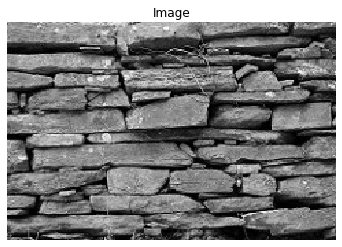

In [4]:
import matplotlib.pyplot as plt

def show_image(image, title='Image', cmap_type='gray', interpolation=None):
    plt.imshow(image, cmap=cmap_type)    
    plt.title(title)
    plt.axis('off')
    plt.show()

show_image(im)

### code

In [5]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)

# Output array
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()

# Print result
print(result)

[[2.68104586 2.95947725 2.84313735 ... 0.         0.         0.        ]
 [3.01830077 3.07058835 3.05098051 ... 0.         0.         0.        ]
 [2.95163405 3.09934652 3.20261449 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


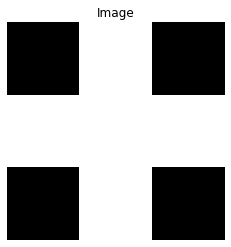

In [6]:
show_image(kernel)

## Defining image convolution kernels
In the previous exercise, you wrote code that performs a convolution given an image and a kernel. This code is now stored in a function called convolution() that takes two inputs: image and kernel and produces the convolved image. In this exercise, you will be asked to define the kernel that finds a particular feature in the image.

For example, the following kernel finds a vertical line in images:

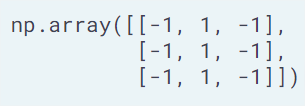

### code

Define a kernel that finds horizontal lines in images.



In [7]:
kernel = np.array([[-1, -1, -1], 
                   [1, 1, 1],
                   [-1, -1, -1]])

Define a kernel that finds a light spot surrounded by dark pixels.



In [8]:
kernel = np.array([[-1, -1, -1], 
                   [-1, 1, -1],
                   [-1, -1, -1]])

Define a kernel that finds a dark spot surrounded by bright pixels.



In [9]:
kernel = np.array([[1, 1, 1], 
                   [1, -1, 1],
                   [1, 1, 1]])

# Implementing image convolutions in Keras


## Convolutional network for image classification
Convolutional networks for classification are constructed from a sequence of convolutional layers (for image processing) and fully connected (Dense) layers (for readout). In this exercise, you will construct a small convolutional network for classification of the data from the fashion dataset.



### code

In [10]:
# Import the necessary components from Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
               input_shape=(28,28,1)))

# Flatten the output of the convolutional layer
model.add(Flatten())
# Add an output layer for the 3 categories
model.add(Dense(3, activation='softmax'))

## Training a CNN to classify clothing types
Before training a neural network it needs to be compiled with the right cost function, using the right optimizer. During compilation, you can also define metrics that the network calculates and reports in every epoch. Model fitting requires a training data set, together with the training labels to the network.

The Conv2D model you built in the previous exercise is available in your workspace.

### init

In [23]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO( train_data , train_labels, image=True)
"""

tobedownloaded="""
{numpy.ndarray: {'train_data[50_28_28_1].csv': 'https://file.io/LOTGUO',
  'train_labels[50_3].csv': 'https://file.io/JtexpW'}}
"""
prefixToc = '2.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

from downloadfromFileIO import getImage
train_data = getImage(prefix+'train_data[50_28_28_1].csv', dtype='float64')
train_labels = getImage(prefix+'train_labels[50_3].csv', dtype='float64')

Téléchargements déjà effectués - SKIP


### code

In [24]:
# Compile the model 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model on a training set
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

Train on 40 samples, validate on 10 samples
Epoch 1/3
40/40 [==============================] - 0s 8ms/step - loss: 1.1377 - acc: 0.3750 - val_loss: 0.9550 - val_acc: 0.8000
Epoch 2/3
40/40 [==============================] - 0s 226us/step - loss: 0.9585 - acc: 0.6750 - val_loss: 0.8099 - val_acc: 0.8000
Epoch 3/3
40/40 [==============================] - 0s 225us/step - loss: 0.8408 - acc: 0.9000 - val_loss: 0.6976 - val_acc: 1.0000


## Evaluating a CNN with test data
To evaluate a trained neural network, you should provide a separate testing data set of labeled images. The model you fit in the previous exercise is available in your workspace.

### init

In [25]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO( test_data , test_labels, image=True)
"""

tobedownloaded="""
{numpy.ndarray: {'test_data[10_28_28_1].csv': 'https://file.io/hL3J32',
  'test_labels[10_3].csv': 'https://file.io/YG7rj8'}}
"""
prefixToc = '2.3'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

from downloadfromFileIO import getImage
test_data = getImage(prefix+'test_data[10_28_28_1].csv', dtype='float64')
test_labels = getImage(prefix+'test_labels[10_3].csv', dtype='float64')


Téléchargements déjà effectués - SKIP


### code

In [26]:
# Evaluate the model on separate test data
model.evaluate(test_data, test_labels, batch_size=10)

10/10 [==============================] - 0s 157us/step


[0.8405053019523621, 0.8999999761581421]

# Tweaking your convolutions


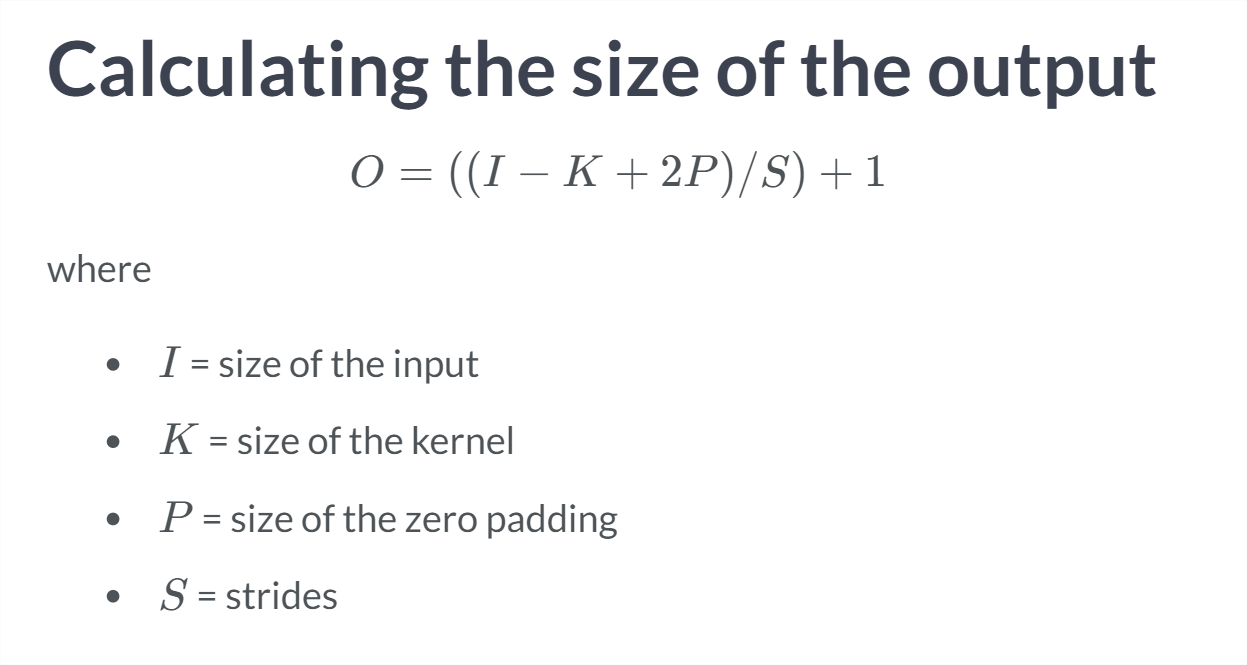

## Add padding to a CNN
Padding allows a convolutional layer to retain the resolution of the input into this layer. This is done by adding zeros around the edges of the input image, so that the convolution kernel can overlap with the pixels on the edge of the image.

### code

In [20]:
img_rows, img_cols = (28,28)

In [21]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1), 
                 padding='same'))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

## Add strides to a convolutional network
The size of the strides of the convolution kernel determines whether the kernel will skip over some of the pixels as it slides along the image. This affects the size of the output because when strides are larger than one, the kernel will be centered on only some of the pixels.

### code

In [22]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
              input_shape=(img_rows, img_cols, 1), 
              strides=2))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))